# Tutorial Four : Multiple Linear Regression Model

## 实验前的准备
本次实验我们载入一些Python的安装包，如下：

In [14]:
import os # 修改工作目录

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from jupyterquiz import display_quiz

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
from scipy.stats import t

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

## 背景

记录了一个班级22名学生在某门课程的两次预试成绩$X_1,X_2$和最后的期末成绩$Y$。

## 数据

数据集Data_3是我们本次使用的数据，具体形式如下所示。

In [15]:
print('Data 3 is shown as follows: \n', pd.read_csv("./Data/Data_3.csv"))

Data 3 is shown as follows: 
     X1  X2   Y
0   78  73  68
1   74  76  75
2   82  79  85
3   90  96  94
4   87  90  86
5   90  92  90
6   83  95  86
7   72  69  68
8   68  67  55
9   69  70  69
10  91  89  91
11  79  75  75
12  89  84  81
13  93  97  91
14  87  77  80
15  91  96  94
16  86  94  94
17  91  92  97
18  81  82  79
19  80  83  84
20  70  66  65
21  79  81  83


在Data_3数据集中共有22名学生的三次考试成绩，包括：两次预试成绩和期末考试成绩。

## 任务

在本次实验中，我们需要解决以下四个问题：

1. 建立多元线性回归模型，描述前两次预试成绩和最后的期末成绩之间的关系。
2. 将数据中心化后，再次拟合线性回归模型，比较与任务1.中的模型进行比较。
3. 利用两次预试成绩来预测期末成绩是否合理？
4. 倘若有两位同学——张三同学和李四同学，不在这22名学生之中。张三同学的前两次预试的成绩分别为88分和92分，李四的前两次预试的成绩分别为50分和60分，请给出他们的期末成绩的点预测和区间预测。

注：本实验中的显著性水平为  𝛼=0.05 。

## 解决方案

### 参数设置

In [16]:
alpha = 0.05

x01 = np.array([[88, 92]]) # 张三的成绩
x02 = np.array([[50, 60]]) # 李四的成绩

### 数据导入

In [17]:
Data = pd.read_csv("./Data/Data_3.csv")
print(Data.head())

   X1  X2   Y
0  78  73  68
1  74  76  75
2  82  79  85
3  90  96  94
4  87  90  86


In [18]:
n = Data.shape[0]
p = Data.shape[1] - 1
print("The number of instances is ", n)
print("The number of features is ", p)

The number of instances is  22
The number of features is  2


### Task 1: 建立多元线性回归模型，描述前两次预试成绩和最后的期末成绩之间的关系

多元线性回归模型形如
$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \epsilon_{i}, i=1,2,\cdots,n
$$
其中，$\beta_0,\beta_1,\beta_2$分别是未知参数，而$\epsilon_{i}$是误差项，且满足$E(\epsilon_{i}) = 0$和$Var(\epsilon_{i}) = \sigma^2$。$n$表示样本量。

我们可以用矩阵的形式来写这个模型，即
$$
\mathbf{y} = \mathbf{X}\mathbf{\beta} + \mathbf{\epsilon}
$$
其中，
- 响应变量构成的向量为$$
\mathbf{y} = \begin{pmatrix}y_1\\y_2\\\vdots\\ y_n\end{pmatrix},
$$
- 自变量/特征构成的矩阵$$
\mathbf{X} = \begin{pmatrix}
1 & x_{11} & x_{12} \\
1 & x_{21} & x_{22} \\
\vdots & \vdots & \vdots \\
1 & x_{n1} & x_{n2} \\
\end{pmatrix},
$$
- 待估参数向量为
$$
\mathbf{\beta} = \begin{pmatrix}
\beta_0 \\ \beta_1 \\ \beta_2
\end{pmatrix},
$$
- 误差向量为
$$
\mathbf{\epsilon} = \begin{pmatrix}\epsilon_1\\\epsilon_2\\\vdots\\ \epsilon_n\end{pmatrix}.
$$


已知参数向量的估计为
$$
\hat{\mathbf{\beta}} = (\mathbf{X}'\mathbf{X})^{-1} \mathbf{X}'\mathbf{y}.
$$

In [19]:
## Method 1: Matrix Calculus
Data1 = sm.add_constant(Data)
Data1_value = Data1.values
X = Data1_value[:,0:(p+1)]
y = Data1_value[:,-1]
beta_hat_1 = np.linalg.inv(X.T @ X) @ (X.T @ y)
# A @ B <=> np.dot(A,B) matrix multiply

print("The estimates of the parameters are \n", 
      np.around(beta_hat_1,4))

The estimates of the parameters are 
 [-14.5005   0.4883   0.672 ]


In [20]:
## Method 2: 「statsmodels」 package
model1 = ols("Y~X1 + X2",Data).fit()
beta_hat_2 = model1.params
#print("The estimates of the parameters are \n", 
#      round(model.param(),4))
print("The estimates of the parameters are \n", 
      round(beta_hat_2,4))

The estimates of the parameters are 
 Intercept   -14.5005
X1            0.4883
X2            0.6720
dtype: float64


In [21]:
## Method 3: 「scikit-learn」package
model2 = linear_model.LinearRegression()
X_without_intercept = X[:,1:3]
model2.fit(X_without_intercept, y)
beta_hat_3 = np.append(np.array(model2.intercept_),model2.coef_)
print("The estimates of the parameters are \n", 
      np.around(beta_hat_3,4))

The estimates of the parameters are 
 [-14.5005   0.4883   0.672 ]


### Task 2: 将数据中心化后，再次拟合线性回归模型，比较与任务1.中的模型进行比较。

In [22]:
## 中心化
X_center = preprocessing.scale(X_without_intercept, with_mean = True, with_std=False)
y_center = preprocessing.scale(y, with_mean = True, with_std=False)
# with_mean = True (default), with_std = True (default)

# print(X_center) 

print("The sample means of centered features are ", np.around(np.mean(X_center,axis=0),4))
print("The sample mean of centered response is ", np.around(np.mean(y_center,axis=0),4))

The sample means of centered features are  [0. 0.]
The sample mean of centered response is  0.0


In [23]:
model3 = linear_model.LinearRegression()
model3.fit(X_center, y_center)
beta_hat_4 = np.append(np.array(model3.intercept_),model3.coef_)
print("The estimates of the parameters are \n", 
      np.around(beta_hat_4,4))

The estimates of the parameters are 
 [-0.      0.4883  0.672 ]


当然，同学们可以尝试采用其他方式得到回归模型中参数的估计。

### Task 3: 利用两次预试成绩来预测期末成绩是否合理？

##### 第一步，我们需要检验回归模型是否显著。

##### 第二步，我们需要检验各个回归参数是否显著。

#### 随堂提问：我们该如何解决？


In [25]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     74.07
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           1.07e-09
Time:                        19:26:02   Log-Likelihood:                -59.840
No. Observations:                  22   AIC:                             125.7
Df Residuals:                      19   BIC:                             129.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5005      9.236     -1.570      0.133     -33.831       4.830
X1             0.4883      0.233      2.096      0.050       0.001       0.976
X2             0.6720      0.179      3.748      0.001       0.297       1.047
==============================================================================
Omnibus:                        0.910   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.703
Skew:                          -0.410   Prob(JB):                        0.704
Kurtosis:                       2.696   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

从上表可知，
- $F$检验统计量可以计算为74.07，其$p$值为$1.07\times 10^{-9}$。因此，我们认为回归模型是有意义的。
- 对于不同的特征，$t$检验统计量分别为$2.096$和$3.748$，其$p$值均不大于$0.05$。因此，我们认为这两个特征都是有意义的。

#### 随堂提问：除了两个检验统计量之外，我们还能从上表中得到什么信息？

### Task 4: 预测

我们可以先画一张图来看一下，用于训练模型的数据与用于测试的数据之间的关系。

Text(50.3, 61, 'S Li')

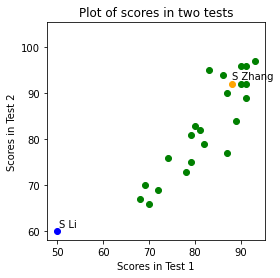

In [13]:
plt.scatter(X[:,1],X[:,2],color = "green")
plt.scatter(88, 92, color='orange', label="张三")
plt.scatter(50, 60, color='blue', label="李四")

plt.title('Plot of scores in two tests')
plt.xlabel('Scores in Test 1')
plt.ylabel('Scores in Test 2')
plt.axis('square')
plt.annotate("S Zhang", (88+0., 92+1))
plt.annotate("S Li", (50+0.3, 60+1))

接下来，在线性回归模型中，我们可以进行两种不同方式的预测。
- 点预测
$$
\hat{y}_0 = \mathbf{x}_0' \hat{\mathcal{\beta}}_0
$$

- 区间预测
$$
\hat{y}_0 \pm t_{1-\alpha/2}(n-p-1) \hat{\sigma} \sqrt{1+\mathbf{x}_0' (\mathbf{X}'\mathbf{X})^{-1} \mathbf{x}_0}
$$
其中，$\hat{\sigma}^2 = (n-p-1) \sum_{i=1}^n e_i^2$.

In [14]:
## 自定义函数

def prediction_interval(x0,X,y):
    # Add intercept to the new vector
    x0 = np.append(1,x0)
    # Parameter setting
    n = X.shape[0]
    p = X.shape[1]-1
    # Modelling
    beta_hat = np.linalg.inv(X.T @ X) @ (X.T @ y) # parameter estimation
    y_fitted = X @ beta_hat # fitted value
    e = y_fitted - y # residuals
    sigma2 = sum(e**2)/(n - p - 1) # estimate of sigma2
    # Interval Construction
    tVal = t.ppf(1-alpha/2, n- p - 1) # quantile
    delta = tVal*np.sqrt(sigma2)*np.sqrt(1 + x0.T @ np.linalg.inv(X.T @ X) @ x0)
    y0_fitted = x0 @ beta_hat
    output = [y0_fitted - delta, y0_fitted + delta] # prediction interval
    return output

In [15]:
##  张三的预测
# 点预测
print("张三期末成绩的点预测为", np.around(model2.predict(x01),4))

# 区间预测
print("张三期末成绩的区间预测为", np.around(prediction_interval(x01,X,y),4))

张三期末成绩的点预测为 [90.3004]
张三期末成绩的区间预测为 [81.6881 98.9128]


In [16]:
##  李四的预测
# 点预测
print("李四期末成绩的点预测为", np.around(model2.predict(x02),4))

# 区间预测
print("李四期末成绩的区间预测为", np.around(prediction_interval(x02,X,y),4))

李四期末成绩的点预测为 [50.2385]
李四期末成绩的区间预测为 [37.8255 62.6515]


#### 随堂提问

##### Q1: 李四期末成绩的点预测为多少？
##### Q2: 李四期末成绩的区间预测为多少？
##### Q3: 通过比较张三和李四期末成绩的预测区间，你有什么结论？